In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Set Seaborn style for enhanced visualization aesthetics
sns.set()

In [78]:
df = pd.read_csv('USBLS_Foodandbev.csv')
print("USBLS_Foodandbev.csv loaded successfully.")

USBLS_Foodandbev.csv loaded successfully.


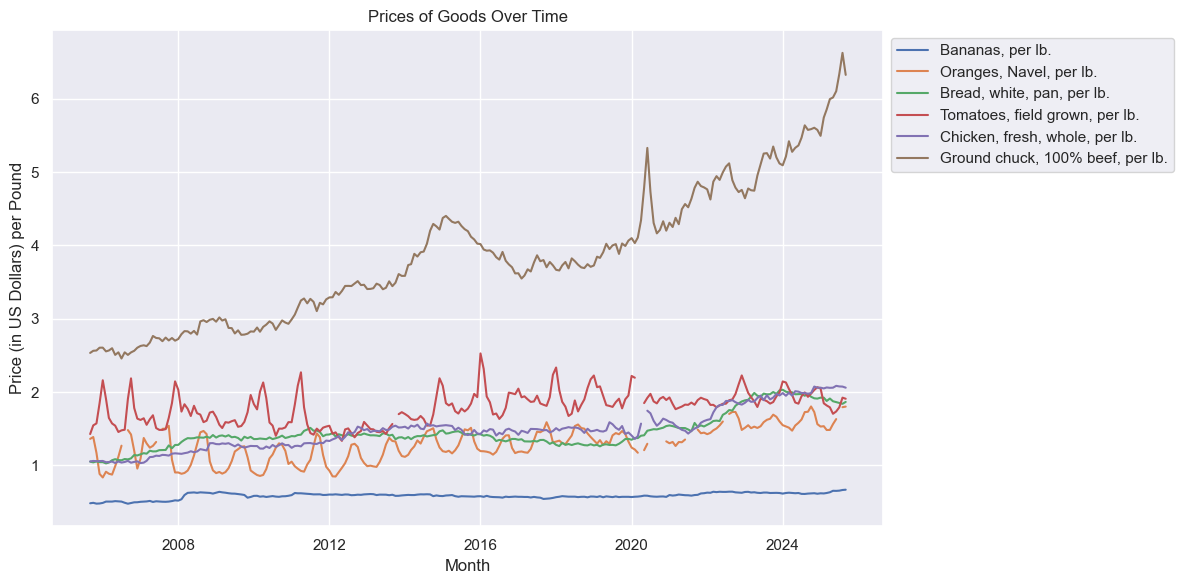

In [79]:
# Convert month to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')

# Set Month as index so it is NOT included in df.columns
df = df.set_index('Month')


df_indexed = df.copy()

plt.figure(figsize=(12, 6))

# Loop through only price columns
for column in df.columns:
    #Filter out unwanted columns to show only wanted units: per lb
    if (column == 'Gasoline, unleaded regular, per gallon'):
        continue
    elif (column == 'Electricity per KWH'):
        continue
    elif (column == 'Utility (piped) gas per therm'):
        continue
    elif (column == 'Milk, fresh, whole, fortified, per gal.'):
        continue
    elif (column == 'Eggs, grade A, large, per doz.'):
        continue

    #add to plot
    plt.plot(df.index, df[column], label=column)

plt.xlabel("Month")
plt.ylabel("Price (in US Dollars) per Pound")
plt.title("Prices of Goods Over Time")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

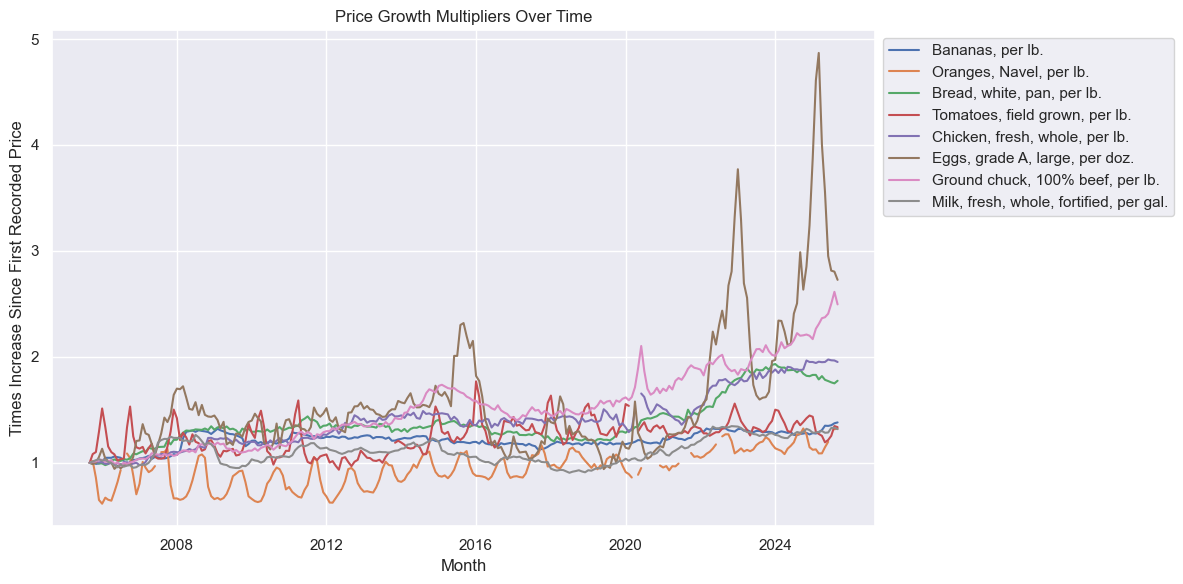

In [80]:
# Divide each column by its first value
df_times_increase = df_indexed / df_indexed.iloc[0]

plt.figure(figsize=(12, 6))

skip = [
    'Gasoline, unleaded regular, per gallon',
    'Electricity per KWH',
    'Utility (piped) gas per therm'
]

for column in df_times_increase.columns:
    if column in skip:
        continue
    plt.plot(df_times_increase.index, df_times_increase[column], label=column)

plt.xlabel("Month")
plt.ylabel("Times Increase Since First Recorded Price")
plt.title("Price Growth Multipliers Over Time")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
df2 = pd.read_csv('CPIUrbanCustomers.csv')
print("CPIUrbanCustomers.csv loaded successfully.")

CPIUrbanCustomers.csv loaded successfully.


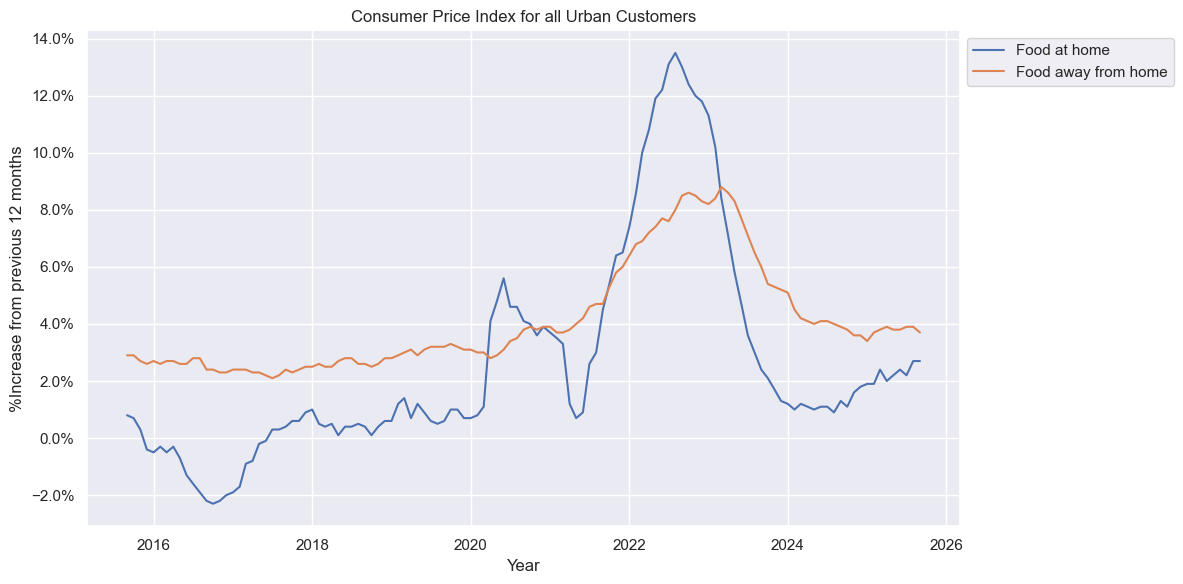

In [82]:
# Convert month to datetime
df2['Month'] = pd.to_datetime(df2['Month'], format='%b-%y')

# Set Month as index so it is NOT included in df.columns
df2 = df2.set_index('Month')

plt.figure(figsize=(12, 6))

# Loop through only price columns
for column in df2.columns:
    #Filter out unwanted columns to show only wanted units: per lb
    if (column == 'Food at home'):
        plt.plot(df2.index, df2[column], label=column)
    elif (column == 'Food away from home'):
        plt.plot(df2.index, df2[column], label=column)

    

plt.xlabel("Year")
plt.ylabel("%Increase from previous 12 months")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Consumer Price Index for all Urban Customers")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()